# K-Means vs Hierarchical and Agglomerative Clustering 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pylab as pl

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

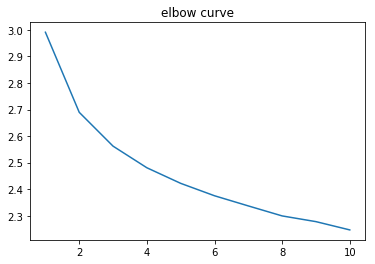

In [17]:
data=pd.read_csv("drug_users.csv")

res = list()
n_clstr = range(1,11)
for n in n_clstr:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    res.append(np.average(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)))

plt.plot(n_clstr, res)
plt.title('elbow curve')
plt.show()

### Task 1-b: Visualization for K-Means Clustering

In this task, we will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. We use 70% of the dataset for training and 30% of the dataset for testing. 

In [22]:
X = data.iloc[:, 0:12];
print(X);
Y = data.iloc[:, 12];
print(Y);

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3);

          Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
5     2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
6     1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207   
7     0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886   
8     0.49788  0.48246   -0.05921  0.24923   -0.31685  0.62967  2.57309   
9     1.82213 -0.48246    1.16365  0.96082   -0.31685 -0.24649  0.00332   
10   -0.07854  0.48246    0.45468  0.96082   -0.31685 -1.05308  0.80523   
11    1.09449 -0.48246   -0.61113 -0.28519   -0.31685 -1.32828  0.00332   
12    1.82213  0.48246   

<class 'pandas.core.frame.DataFrame'>


c:\users\sanju\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


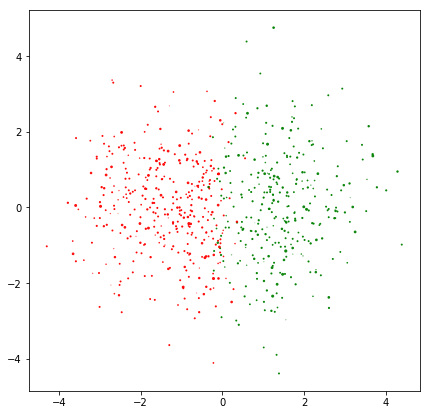

In [32]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=2)

#Since, we observed an elbow at n=2 from the graph., we proceed with 2 clusters
kmeans.fit(X_train)

y_pred =kmeans.predict(X_train)
y_pred_df=pd.DataFrame(data=y_pred)
X_train_pca = pd.DataFrame(X_train.values)

# Data Normalization
from sklearn.preprocessing import StandardScaler
X_standard = StandardScaler().fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
pca = PCA(n_components=2)
x_7d = pd.DataFrame(pca.fit_transform(X_standard))
print(type(x_7d))
output=pd.concat([x_7d,y_pred_df],axis=1)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]

plt.figure(figsize = (7,7))

plt.scatter(x_7d.iloc[:,0],x_7d.iloc[:,1], output,c= label_color, alpha=0.9) 
plt.show()

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

<class 'pandas.core.frame.DataFrame'>


c:\users\sanju\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


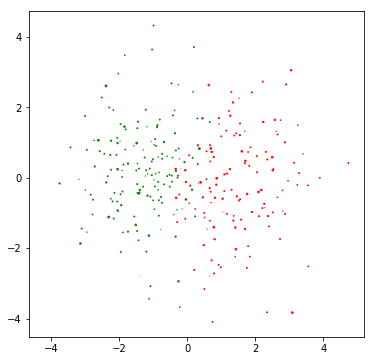

In [34]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test)
y_pred = kmeans.predict(X_test)
y_pred_df = pd.DataFrame(data=y_pred)

X_test_pca = pd.DataFrame(X_test.values)

# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_test)pca = PCA(n_components=2)
x_7d = pd.DataFrame(pca.fit_transform(X_std))
print(type(x_7d))
finaldata=pd.concat([x_7d,y_pred_df],axis=1)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]

plt.figure(figsize = (6,6))
plt.scatter(x_7d.iloc[:,0],x_7d.iloc[:,1], finaldata,c= label_color, alpha=0.9) 
plt.show()

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [7]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred));

[[192  37]
 [ 90 247]]


#  Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, we will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [35]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score

prdstmrx_train = pairwise_distances(X_train, Y=None, metric='euclidean')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
CompleteCosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
y_pred_complete_cosine = CompleteCosine.fit_predict(prdstmrx_train)
f1_score_complete_cosine = f1_score(Y_train, y_pred_complete_cosine, labels=None, pos_label=1, average='binary', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
CompleteEuclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_pred_complete_euclidean = CompleteEuclidean.fit_predict(prdstmrx_train)
f1_score_complete_euclidean = f1_score(Y_train, y_pred_complete_euclidean, labels=None, pos_label=1, average='binary', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
CompleteManhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
y_pred_complete_manhattan = CompleteManhattan.fit_predict(prdstmrx_train)
f1_score_complete_manhattan = f1_score(Y_train, y_pred_complete_manhattan, labels=None, pos_label=1, average='binary', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
AverageCosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
y_pred_average_cosine = AverageCosine.fit_predict(prdstmrx_train)
f1_score_average_cosine = f1_score(Y_train, y_pred_average_cosine, labels=None, pos_label=1, average='binary', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
AverageEuclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_pred_average_euclidean = AverageEuclidean.fit_predict(prdstmrx_train)
f1_score_average_euclidean = f1_score(Y_train, y_pred_average_euclidean, labels=None, pos_label=1, average='binary', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
AverageManhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
y_pred_average_manhattan = AverageManhattan.fit_predict(prdstmrx_train)
f1_score_average_manhattan = f1_score(Y_train, y_pred_average_manhattan, labels=None, pos_label=1, average='binary', sample_weight=None)


print("F1-score for complete linkage + cosine", f1_score_complete_cosine)
print("F1-score for complete linkage + euclidean", f1_score_complete_euclidean)
print("F1-score for complete linkage + manhattan", f1_score_complete_manhattan)
print("F1-score for average linkage + cosine", f1_score_average_cosine)
print("F1-score for average linkage + euclidean", f1_score_average_euclidean)
print("F1-score for average linkage + manhattan", f1_score_average_manhattan)

F1-score for complete linkage + cosine 0.653061224489796
F1-score for complete linkage + euclidean 0.6119733924611973
F1-score for complete linkage + manhattan 0.6716981132075471
F1-score for average linkage + cosine 0.2017200938232995
F1-score for average linkage + euclidean 0.17063989962358844
F1-score for average linkage + manhattan 0.1704260651629073


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Finding the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. We use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

<class 'pandas.core.frame.DataFrame'>


c:\users\sanju\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


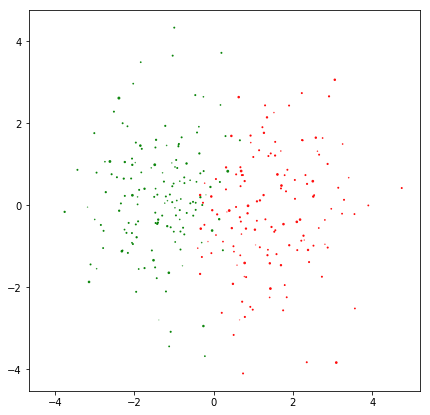

In [37]:
y_pred_dataframe=pd.DataFrame(data=y_pred_complete_cosine)

pca = PCA(n_components=2)
x_7d = pd.DataFrame(pca.fit_transform(X_std))
print(type(x_7d))
finaldata=pd.concat([x_7d,y_pred_df],axis=1)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]

plt.figure(figsize = (7,7))
plt.scatter(x_7d.iloc[:,0],x_7d.iloc[:,1], finaldata,c= label_color, alpha=0.9) 
plt.show()

#   Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

c:\users\sanju\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


<class 'pandas.core.frame.DataFrame'>


c:\users\sanju\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


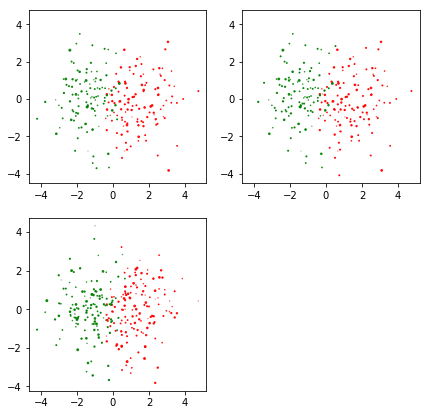

In [39]:
X_train = data.iloc[:, 0:12]
Y_split = data.iloc[:, 12]

kmeans = KMeans(n_clusters=2)
y_pred_k = kmeans.fit_predict(X_train)

y_pred_df = pd.DataFrame(data=y_pred_k)

prdstmrx_train = pairwise_distances(X_train, Y = None, metric='euclidean')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)

CompleteCosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
y_pred_complete_cosine = pd.DataFrame(CompleteCosine.fit_predict(prdstmrx_train))

X_pca = pd.DataFrame(X_test.values)

from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_pca)


pca = PCA(n_components=2)
x_7d = pd.DataFrame(pca.fit_transform(X_std))
print(type(x_7d))
y_split_df=pd.DataFrame(data=Y_split)
finaldata=pd.concat([x_7d,y_split_df],axis=1)
finaldata_k=pd.concat([x_7d,y_pred_df],axis=1)
finaldata_a=pd.concat([x_7d,y_pred_complete_cosine])
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]

plt.figure(figsize = (7,7))
ax=plt.subplot(2, 2, 1)
kx=plt.subplot(2,2,2)
aglox=plt.subplot(2,2,3)
ax.scatter(x_7d.iloc[:,0],x_7d.iloc[:,1], finaldata,c= label_color, alpha=0.9) 
kx.scatter(x_7d.iloc[:,0],x_7d.iloc[:,1], finaldata_k,c= label_color, alpha=0.9) 
aglox.scatter(x_7d.iloc[:,0],x_7d.iloc[:,1], finaldata_a,c= label_color, alpha=0.9) 
plt.show()

## Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

In [40]:
print("K-means information:")
print(confusion_matrix(Y_split,y_pred_k))
print(classification_report(Y_split,y_pred_k))

print("Agglomerative clustering information:")
print(confusion_matrix(Y_split,y_pred_complete_cosine))
print(classification_report(Y_split,y_pred_complete_cosine))

K-means information:
[[683 157]
 [272 773]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       840
           1       0.83      0.74      0.78      1045

   micro avg       0.77      0.77      0.77      1885
   macro avg       0.77      0.78      0.77      1885
weighted avg       0.78      0.77      0.77      1885

Agglomerative clustering information:
[[702 138]
 [390 655]]
              precision    recall  f1-score   support

           0       0.64      0.84      0.73       840
           1       0.83      0.63      0.71      1045

   micro avg       0.72      0.72      0.72      1885
   macro avg       0.73      0.73      0.72      1885
weighted avg       0.74      0.72      0.72      1885



In [1]:
print('The classification report of K-means is better than that of Agglomerative clustering because Precision, Recall, F1-score, and Support values are more for K-means.')

The classification report of K-means is better than that of Agglomerative clustering because Precision, Recall, F1-score, and Support values are more for K-means.


In [3]:
# References
https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method 
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 
https://www.datacamp.com/community/tutorials/k-means-clustering-python  
http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf
https://towardsdatascience.com/unsupervised-learning-k-means-vs-hierarchical-clustering-5fe2da7c9554 
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


SyntaxError: invalid syntax (<ipython-input-3-de12cdb97682>, line 2)